In [1]:
import os, shutil
import mdtraj as md
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import pickle
import glob
from collections import Counter


import pyemma
import pyemma.coordinates as coor

from deeptime.clustering import RegularSpace


## Separate the traj 

In [2]:
traj_path = '../PROJ12462traj'
log_path = '../log'

for r in range(2, 3):
    for c in range(100):
        input_xtc_file = f"{traj_path}/r{r}c{c}_inte.xtc"
        input_top_file = 'single_peptoid.gro'
        csv_log = f"{log_path}/RUN{r}_CLONE{c}_log.csv"

        # Check if input files exist
        if not os.path.exists(input_xtc_file):
            print(f"File not found: {input_xtc_file}")
            continue

        if not os.path.exists(csv_log):
            print(f"Log file not found: {csv_log}")
            continue

        # Load log and convert states
        df_log = pd.read_csv(csv_log, header=0)
        log = df_log.iloc[:, 0].tolist()

        try:
            states = [int(state) for state in log]
        except ValueError as e:
            print(f"Error converting states to integers for RUN{r}_CLONE{c}: {e}")
            continue

        # Load trajectory
        traj = md.load(input_xtc_file, top=input_top_file)

        for j in range(0, 4):  # Enumerate states 0 - 3
            state_frames = [i for i, state in enumerate(states) if state == j and i < traj.n_frames]
            output_xtc_file = f"{traj_path}/r{r}c{c}_intestate{j}.xtc"

            if state_frames:
                new_traj = traj.slice(state_frames)
                new_traj.save_xtc(output_xtc_file)
                print(f"New XTC file saved with frames where state is {j}: {output_xtc_file}")
            else:
                print(f"No frames with state {j} found for RUN{r}_CLONE{c}.")

New XTC file saved with frames where state is 0: ../PROJ12462traj/r2c0_intestate0.xtc
New XTC file saved with frames where state is 1: ../PROJ12462traj/r2c0_intestate1.xtc
New XTC file saved with frames where state is 2: ../PROJ12462traj/r2c0_intestate2.xtc
New XTC file saved with frames where state is 3: ../PROJ12462traj/r2c0_intestate3.xtc
New XTC file saved with frames where state is 0: ../PROJ12462traj/r2c1_intestate0.xtc
New XTC file saved with frames where state is 1: ../PROJ12462traj/r2c1_intestate1.xtc
New XTC file saved with frames where state is 2: ../PROJ12462traj/r2c1_intestate2.xtc
New XTC file saved with frames where state is 3: ../PROJ12462traj/r2c1_intestate3.xtc
New XTC file saved with frames where state is 0: ../PROJ12462traj/r2c2_intestate0.xtc
New XTC file saved with frames where state is 1: ../PROJ12462traj/r2c2_intestate1.xtc
New XTC file saved with frames where state is 2: ../PROJ12462traj/r2c2_intestate2.xtc
New XTC file saved with frames where state is 3: ../PR

## Make the omega_data

In [3]:
# Define the directory path
directory = "omega_data/"

# Check if the directory exists
if os.path.exists(directory):
    # Remove all contents of the directory
    shutil.rmtree(directory)
    # Recreate the empty directory
    os.makedirs(directory)
    print(f"All contents in '{directory}' have been cleared.")
else:
    # Create the directory if it does not exist
    os.makedirs(directory)
    print(f"Directory '{directory}' did not exist, so it has been created.")


All contents in 'omega_data/' have been cleared.


In [4]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Create a one whole traj of all the clone

In [5]:
# Select Omega backbone as features 

omega_atoms = [
    [6, 7, 18, 36],
    [36, 39, 41, 45],
    [45, 46, 57, 75]
]

# Convert to numpy array, subtract 1, and convert back to list (if required)
omega_atoms = np.array(omega_atoms) - 1
omega_atoms = omega_atoms.tolist()  

In [7]:
import types
import mdtraj
mdtraj.version = types.SimpleNamespace(version=mdtraj.__version__)

peptoid_gro = 'single_peptoid.gro'
traj_dir = '../PROJ12462traj'
save_dir = 'omega_data'
all_state_data = []

# Grab the file with sequential arrangment 
files = []
for r in range(2, 3):
    for c in range(100):
        input_xtc_file = f"{traj_dir}/r{r}c{c}_inte.xtc"

        # Check if the file exists before adding
        if os.path.exists(input_xtc_file):
            files.append(input_xtc_file)
        else:
            print(f"File not found: {input_xtc_file}")

print(files)

# Using pyemma to extract the feature 
feat = pyemma.coordinates.featurizer(peptoid_gro)
feat.add_dihedrals(omega_atoms,deg=True) # Select the backbone omega angles 


data = coor.load(files, features=feat)

print('type of data:', type(data))
print('lengths:', len(data))
print('shape of elements:', data[0].shape)
print('n_atoms:', feat.topology.n_atoms)

data_object = Data(data)
data_object.save(f"{save_dir}/all_omega.pkl")
print(f"Data save at: {save_dir}/all_omega.pkl")



['../PROJ12462traj/r2c0_inte.xtc', '../PROJ12462traj/r2c1_inte.xtc', '../PROJ12462traj/r2c2_inte.xtc', '../PROJ12462traj/r2c3_inte.xtc', '../PROJ12462traj/r2c4_inte.xtc', '../PROJ12462traj/r2c5_inte.xtc', '../PROJ12462traj/r2c6_inte.xtc', '../PROJ12462traj/r2c7_inte.xtc', '../PROJ12462traj/r2c8_inte.xtc', '../PROJ12462traj/r2c9_inte.xtc', '../PROJ12462traj/r2c10_inte.xtc', '../PROJ12462traj/r2c11_inte.xtc', '../PROJ12462traj/r2c12_inte.xtc', '../PROJ12462traj/r2c13_inte.xtc', '../PROJ12462traj/r2c14_inte.xtc', '../PROJ12462traj/r2c15_inte.xtc', '../PROJ12462traj/r2c16_inte.xtc', '../PROJ12462traj/r2c17_inte.xtc', '../PROJ12462traj/r2c18_inte.xtc', '../PROJ12462traj/r2c19_inte.xtc', '../PROJ12462traj/r2c20_inte.xtc', '../PROJ12462traj/r2c21_inte.xtc', '../PROJ12462traj/r2c22_inte.xtc', '../PROJ12462traj/r2c23_inte.xtc', '../PROJ12462traj/r2c24_inte.xtc', '../PROJ12462traj/r2c25_inte.xtc', '../PROJ12462traj/r2c26_inte.xtc', '../PROJ12462traj/r2c27_inte.xtc', '../PROJ12462traj/r2c28_inte.

Obtaining file info:   0%|          | 0/100 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/100 [00:00<?, ?it/s]

type of data: <class 'list'>
lengths: 100
shape of elements: (206002, 3)
n_atoms: 82
Data save at: omega_data/all_omega.pkl


## Featurization of each state

In [8]:
# Select Omega backbone as features 

omega_atoms = [
    [6, 7, 18, 36],
    [36, 39, 41, 45],
    [45, 46, 57, 75]
]

# Convert to numpy array, subtract 1, and convert back to list (if required)
omega_atoms = np.array(omega_atoms) - 1
omega_atoms = omega_atoms.tolist()  

In [9]:
peptoid_gro = 'single_peptoid.gro'
traj_dir = '../PROJ12462traj'
save_dir = 'omega_data'
n_state = 4
all_state_data = []


for state in range(n_state):
    file_pattern = f"{traj_dir}/r*c*_intestate{state}.xtc"
    files = glob.glob(file_pattern)
    print(files)

    # Using pyemma to extract the feature 
    feat = pyemma.coordinates.featurizer(peptoid_gro)
    feat.add_dihedrals(omega_atoms,deg=True) # Select the backbone omega angles 
    

    data = coor.load(files, features=feat)

    print('type of data:', type(data))
    print('lengths:', len(data))
    print('shape of elements:', data[0].shape)
    print('n_atoms:', feat.topology.n_atoms)

    data_object = Data(data)
    data_object.save(f"{save_dir}/omega_state{state}.pkl")
    print(f"Data save at: {save_dir}/omega_state{state}.pkl")
    


['../PROJ12462traj/r2c39_intestate0.xtc', '../PROJ12462traj/r2c48_intestate0.xtc', '../PROJ12462traj/r2c55_intestate0.xtc', '../PROJ12462traj/r2c40_intestate0.xtc', '../PROJ12462traj/r2c31_intestate0.xtc', '../PROJ12462traj/r2c24_intestate0.xtc', '../PROJ12462traj/r2c47_intestate0.xtc', '../PROJ12462traj/r2c52_intestate0.xtc', '../PROJ12462traj/r2c23_intestate0.xtc', '../PROJ12462traj/r2c36_intestate0.xtc', '../PROJ12462traj/r2c53_intestate0.xtc', '../PROJ12462traj/r2c46_intestate0.xtc', '../PROJ12462traj/r2c37_intestate0.xtc', '../PROJ12462traj/r2c22_intestate0.xtc', '../PROJ12462traj/r2c41_intestate0.xtc', '../PROJ12462traj/r2c54_intestate0.xtc', '../PROJ12462traj/r2c25_intestate0.xtc', '../PROJ12462traj/r2c30_intestate0.xtc', '../PROJ12462traj/r2c38_intestate0.xtc', '../PROJ12462traj/r2c49_intestate0.xtc', '../PROJ12462traj/r2c27_intestate0.xtc', '../PROJ12462traj/r2c32_intestate0.xtc', '../PROJ12462traj/r2c43_intestate0.xtc', '../PROJ12462traj/r2c56_intestate0.xtc', '../PROJ12462tr

Obtaining file info:   0%|          | 0/100 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/100 [00:00<?, ?it/s]

type of data: <class 'list'>
lengths: 100
shape of elements: (74793, 3)
n_atoms: 82
Data save at: omega_data/omega_state0.pkl
['../PROJ12462traj/r2c24_intestate1.xtc', '../PROJ12462traj/r2c31_intestate1.xtc', '../PROJ12462traj/r2c40_intestate1.xtc', '../PROJ12462traj/r2c55_intestate1.xtc', '../PROJ12462traj/r2c48_intestate1.xtc', '../PROJ12462traj/r2c39_intestate1.xtc', '../PROJ12462traj/r2c36_intestate1.xtc', '../PROJ12462traj/r2c23_intestate1.xtc', '../PROJ12462traj/r2c52_intestate1.xtc', '../PROJ12462traj/r2c47_intestate1.xtc', '../PROJ12462traj/r2c22_intestate1.xtc', '../PROJ12462traj/r2c37_intestate1.xtc', '../PROJ12462traj/r2c46_intestate1.xtc', '../PROJ12462traj/r2c53_intestate1.xtc', '../PROJ12462traj/r2c49_intestate1.xtc', '../PROJ12462traj/r2c38_intestate1.xtc', '../PROJ12462traj/r2c30_intestate1.xtc', '../PROJ12462traj/r2c25_intestate1.xtc', '../PROJ12462traj/r2c54_intestate1.xtc', '../PROJ12462traj/r2c41_intestate1.xtc', '../PROJ12462traj/r2c56_intestate1.xtc', '../PROJ1246

Obtaining file info:   0%|          | 0/100 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/100 [00:00<?, ?it/s]

type of data: <class 'list'>
lengths: 100
shape of elements: (65936, 3)
n_atoms: 82
Data save at: omega_data/omega_state1.pkl
['../PROJ12462traj/r2c36_intestate2.xtc', '../PROJ12462traj/r2c23_intestate2.xtc', '../PROJ12462traj/r2c52_intestate2.xtc', '../PROJ12462traj/r2c47_intestate2.xtc', '../PROJ12462traj/r2c24_intestate2.xtc', '../PROJ12462traj/r2c31_intestate2.xtc', '../PROJ12462traj/r2c40_intestate2.xtc', '../PROJ12462traj/r2c55_intestate2.xtc', '../PROJ12462traj/r2c48_intestate2.xtc', '../PROJ12462traj/r2c39_intestate2.xtc', '../PROJ12462traj/r2c49_intestate2.xtc', '../PROJ12462traj/r2c38_intestate2.xtc', '../PROJ12462traj/r2c30_intestate2.xtc', '../PROJ12462traj/r2c25_intestate2.xtc', '../PROJ12462traj/r2c54_intestate2.xtc', '../PROJ12462traj/r2c41_intestate2.xtc', '../PROJ12462traj/r2c22_intestate2.xtc', '../PROJ12462traj/r2c37_intestate2.xtc', '../PROJ12462traj/r2c46_intestate2.xtc', '../PROJ12462traj/r2c53_intestate2.xtc', '../PROJ12462traj/r2c28_intestate2.xtc', '../PROJ1246

Obtaining file info:   0%|          | 0/100 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/100 [00:00<?, ?it/s]

type of data: <class 'list'>
lengths: 100
shape of elements: (61544, 3)
n_atoms: 82
Data save at: omega_data/omega_state2.pkl
['../PROJ12462traj/r2c47_intestate3.xtc', '../PROJ12462traj/r2c52_intestate3.xtc', '../PROJ12462traj/r2c23_intestate3.xtc', '../PROJ12462traj/r2c36_intestate3.xtc', '../PROJ12462traj/r2c39_intestate3.xtc', '../PROJ12462traj/r2c48_intestate3.xtc', '../PROJ12462traj/r2c55_intestate3.xtc', '../PROJ12462traj/r2c40_intestate3.xtc', '../PROJ12462traj/r2c31_intestate3.xtc', '../PROJ12462traj/r2c24_intestate3.xtc', '../PROJ12462traj/r2c41_intestate3.xtc', '../PROJ12462traj/r2c54_intestate3.xtc', '../PROJ12462traj/r2c25_intestate3.xtc', '../PROJ12462traj/r2c30_intestate3.xtc', '../PROJ12462traj/r2c38_intestate3.xtc', '../PROJ12462traj/r2c49_intestate3.xtc', '../PROJ12462traj/r2c53_intestate3.xtc', '../PROJ12462traj/r2c46_intestate3.xtc', '../PROJ12462traj/r2c37_intestate3.xtc', '../PROJ12462traj/r2c22_intestate3.xtc', '../PROJ12462traj/r2c35_intestate3.xtc', '../PROJ1246

Obtaining file info:   0%|          | 0/100 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/100 [00:00<?, ?it/s]

type of data: <class 'list'>
lengths: 100
shape of elements: (59799, 3)
n_atoms: 82
Data save at: omega_data/omega_state3.pkl


In [10]:
## Save the feature 

save_dir = 'omega_data'

np.save(f"{save_dir}/features", feat)
print(f"Features save at: {save_dir}/features.npy")
all_features = feat.describe()  # `describe()` should list all feature descriptions
for i, feature in enumerate(all_features):
    print(i+1, feature)


Features save at: omega_data/features.npy
1 DIH: Q03 2 CA 5 - Q03 2 C 6 - R07 3 N 17 - R07 3 CA 35 
2 DIH: R07 3 CA 35 - R07 3 C 38 - Q03 4 N 40 - Q03 4 CA 44 
3 DIH: Q03 4 CA 44 - Q03 4 C 45 - R07 5 N 56 - R07 5 CA 74 


## Combine the omega into one large traj, and plot them

### Origin Omega

In [11]:
save_dir = 'omega_data'
omega=Data.load(f"{save_dir}/omega_state0.pkl").array_list # This is an (85, x, 3) array
combined_omega = np.vstack(omega)
combined_omega = (combined_omega + 90.0) % 360.0 - 90.0 # Adjust omega values into the range (-90, 270)
print(f"The shape of combined_omega is {combined_omega.shape}")
print(combined_omega[:5])

The shape of combined_omega is (5926448, 3)
[[170.27057 176.1753  178.87286]
 [161.59499 219.9029  176.5625 ]
 [180.81    174.47253 172.68524]
 [144.34103 174.7157  179.47095]
 [174.87631 182.43268 168.8761 ]]


KeyboardInterrupt: 

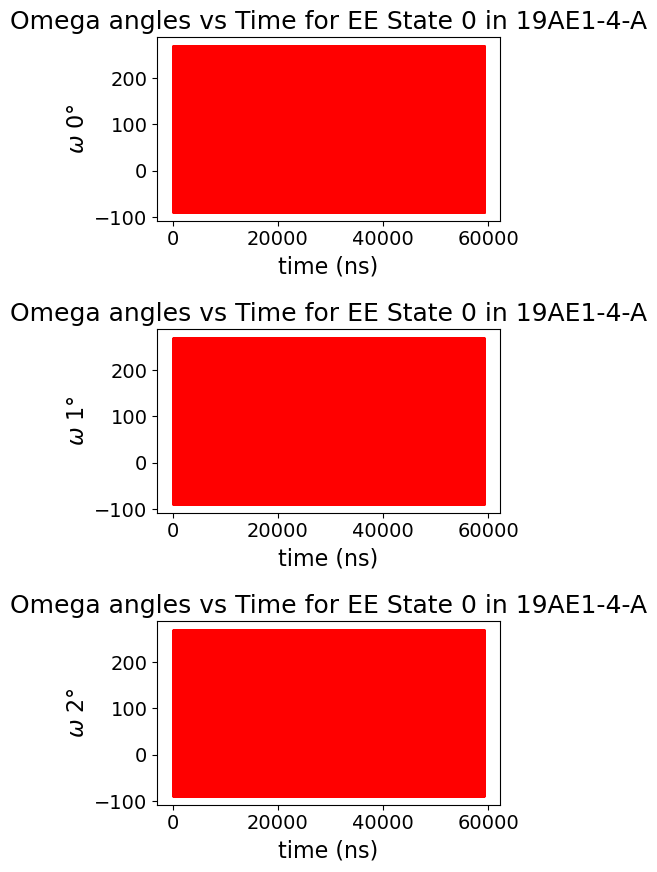

In [12]:
start = 0
nsnaps = combined_omega.shape[0]
t = np.arange(start, nsnaps) * 0.01 # Time axis in ns
step = 1000
downsampled_omega = combined_omega[start:nsnaps:step, :]  # Downsampled omega data

residues_to_plot = [0, 1, 2]
num_residues = len(residues_to_plot)

# Set default font sizes globally
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize=18)   # legend fontsize

plt.figure(figsize=(5, 9))
for panel, residue in enumerate(residues_to_plot, 1):
    plt.subplot(num_residues, 1, panel)
    plt.plot(t, combined_omega[start:nsnaps, residue], '.', ms=0.5, color='red')
    plt.xlabel('time (ns)')
    plt.ylabel(f'$\\omega$ {residue}°')
    plt.title(f'Omega angles vs Time for EE State 0 in 19AE1-4-A')

plt.tight_layout()

# Ensure the directory exists
outfilename = f'omega_data/Omega_angles_vs_Time_EE_in_19AE1-4-A.png'
plt.savefig(outfilename, transparent=True, dpi=600)
print(f"Saved at: {outfilename}")
#plt.show()

### Origin Omega

The shape of combined_omega is (614382, 3)
[[ 46.294556 132.19994  131.5444  ]
 [ 65.191925 122.26904  214.46689 ]
 [265.1761   118.30054  208.73172 ]
 [201.50055  134.47054  140.38872 ]
 [242.33661  127.14273  179.04541 ]]


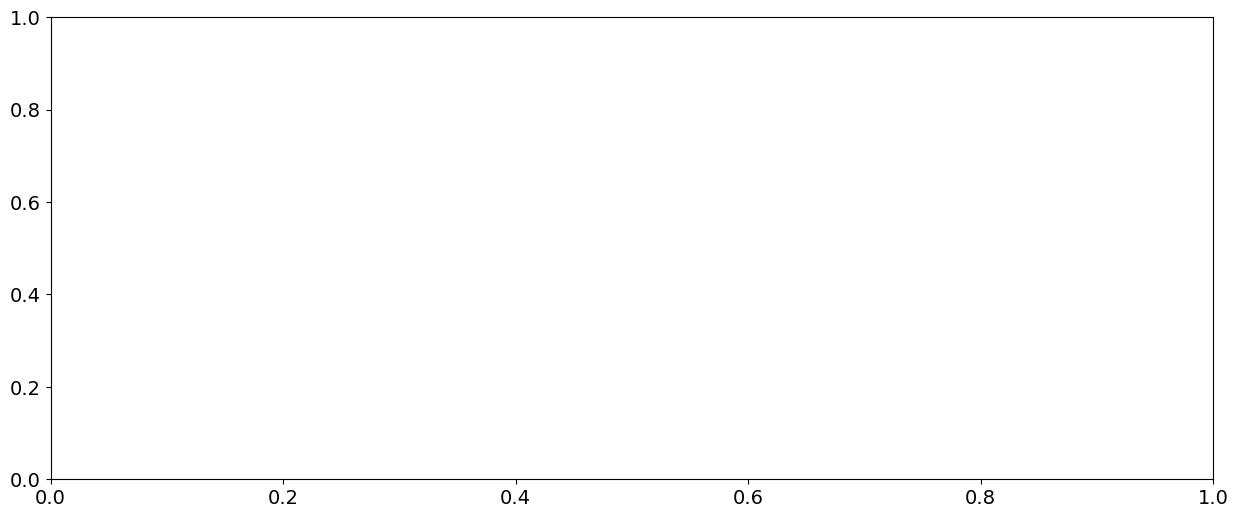

In [15]:
save_dir = 'omega_data'
omega=Data.load(f"{save_dir}/omega_state3.pkl").array_list # This is an (85, x, 3) array
combined_omega = np.vstack(omega)
combined_omega = (combined_omega + 90.0) % 360.0 - 90.0 # Adjust omega values into the range (-90, 270)
print(f"The shape of combined_omega is {combined_omega.shape}")
print(combined_omega[:5])


state = 4 
fig, ax = plt.subplots(figsize=(15, 6))


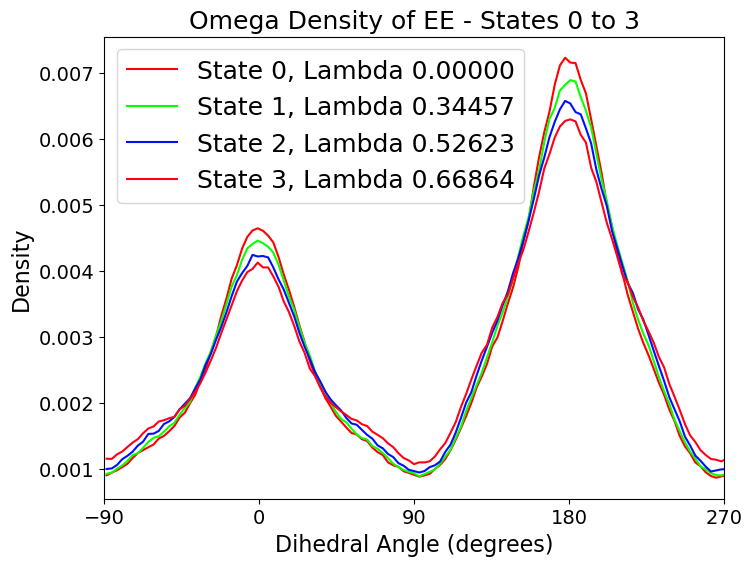

In [16]:
save_dir = 'omega_data'
num_states = 4
lambda_val = ['0.00000', '0.34457', '0.52623', '0.66864']

fig, ax = plt.subplots(figsize=(8, 6))
cmap = cm.get_cmap('hsv', 4)
colors = [cmap(i) for i in range(4)]

for state in range(num_states):
    omega = Data.load(f"{save_dir}/omega_state{state}.pkl").array_list  # Load each state
    combined_omega = np.vstack(omega)
    combined_omega = (combined_omega + 90.0) % 360.0 - 90.0

    bins = np.linspace(-90, 270, 120)
    counts, bin_edges = np.histogram(combined_omega, bins=bins, density=True)
    counts = np.concatenate([counts, counts[:1]])
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_centers = np.append(bin_centers, bin_centers[0] + 360)

    ax.plot(bin_centers, counts, color=colors[state], label=f'State {state}, Lambda {lambda_val[state]}')

ax.set_title('Omega Density of EE - States 0 to 3')
ax.set_xlabel('Dihedral Angle (degrees)')
ax.set_ylabel('Density')
ax.set_xlim([-90, 270])
ax.set_xticks([-90, 0, 90, 180, 270])
ax.legend()

plt.show()


Saved at: omega_data/Omega_angles_vs_Time_EE_state1_in_19AE1-4-A.png


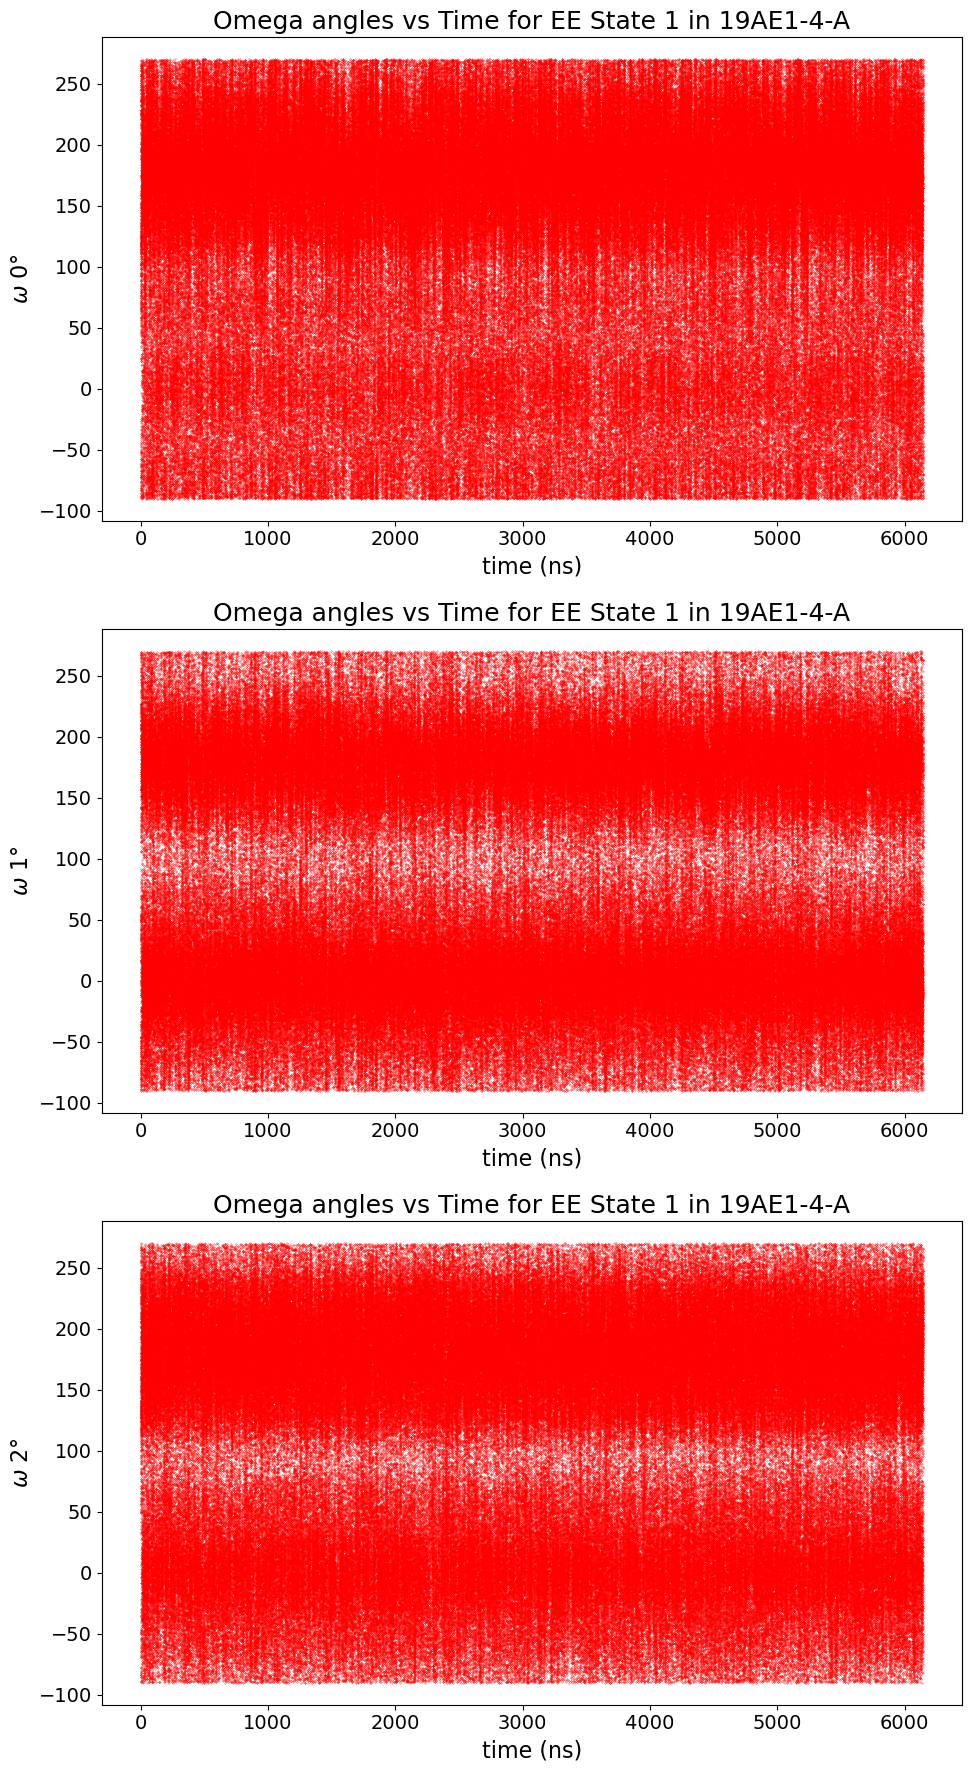

In [17]:
start = 0
nsnaps = combined_omega.shape[0]
t = np.arange(start, nsnaps) * 0.01 # Time axis in ns
step = 1000
downsampled_omega = combined_omega[start:nsnaps:step, :]  # Downsampled omega data

residues_to_plot = [0, 1, 2]
num_residues = len(residues_to_plot)

# Set default font sizes globally
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize=18)   # legend fontsize

plt.figure(figsize=(10, 18))
for panel, residue in enumerate(residues_to_plot, 1):
    plt.subplot(num_residues, 1, panel)
    plt.plot(t, combined_omega[start:nsnaps, residue], '.', ms=0.5, color='red')
    plt.xlabel('time (ns)')
    plt.ylabel(f'$\\omega$ {residue}°')
    plt.title(f'Omega angles vs Time for EE State 1 in 19AE1-4-A')

plt.tight_layout()

# Ensure the directory exists
outfilename = f'omega_data/Omega_angles_vs_Time_EE_state1_in_19AE1-4-A.png'
plt.savefig(outfilename, transparent=True, dpi=600)
print(f"Saved at: {outfilename}")
#plt.show()

### Filtered Omega, where only keep the data point between (135, 225) for trans and (-45, 45) for cis

In [18]:
## Filter out the omegas 

# Define filtering conditions
lower_bound_180 = 135  # 180 - 45
upper_bound_180 = 225  # 180 + 45
lower_bound_0 = -45    # 0 - 45
upper_bound_0 = 45     # 0 + 45

# Create a boolean mask where all three values in a row satisfy the condition
mask = (
    ((lower_bound_180 <= combined_omega) & (combined_omega <= upper_bound_180)) | 
    ((lower_bound_0 <= combined_omega) & (combined_omega <= upper_bound_0))
).all(axis=1)

# Apply the mask to filter the data
filtered_omega = combined_omega[mask]

# Print results
print("Original shape:", combined_omega.shape)
print("Filtered shape:", filtered_omega.shape)


Original shape: (614382, 3)
Filtered shape: (289224, 3)


Saved at: omega_data/Omega_angles_vs_Time_EE_state1_in_19AE1-4-A.png


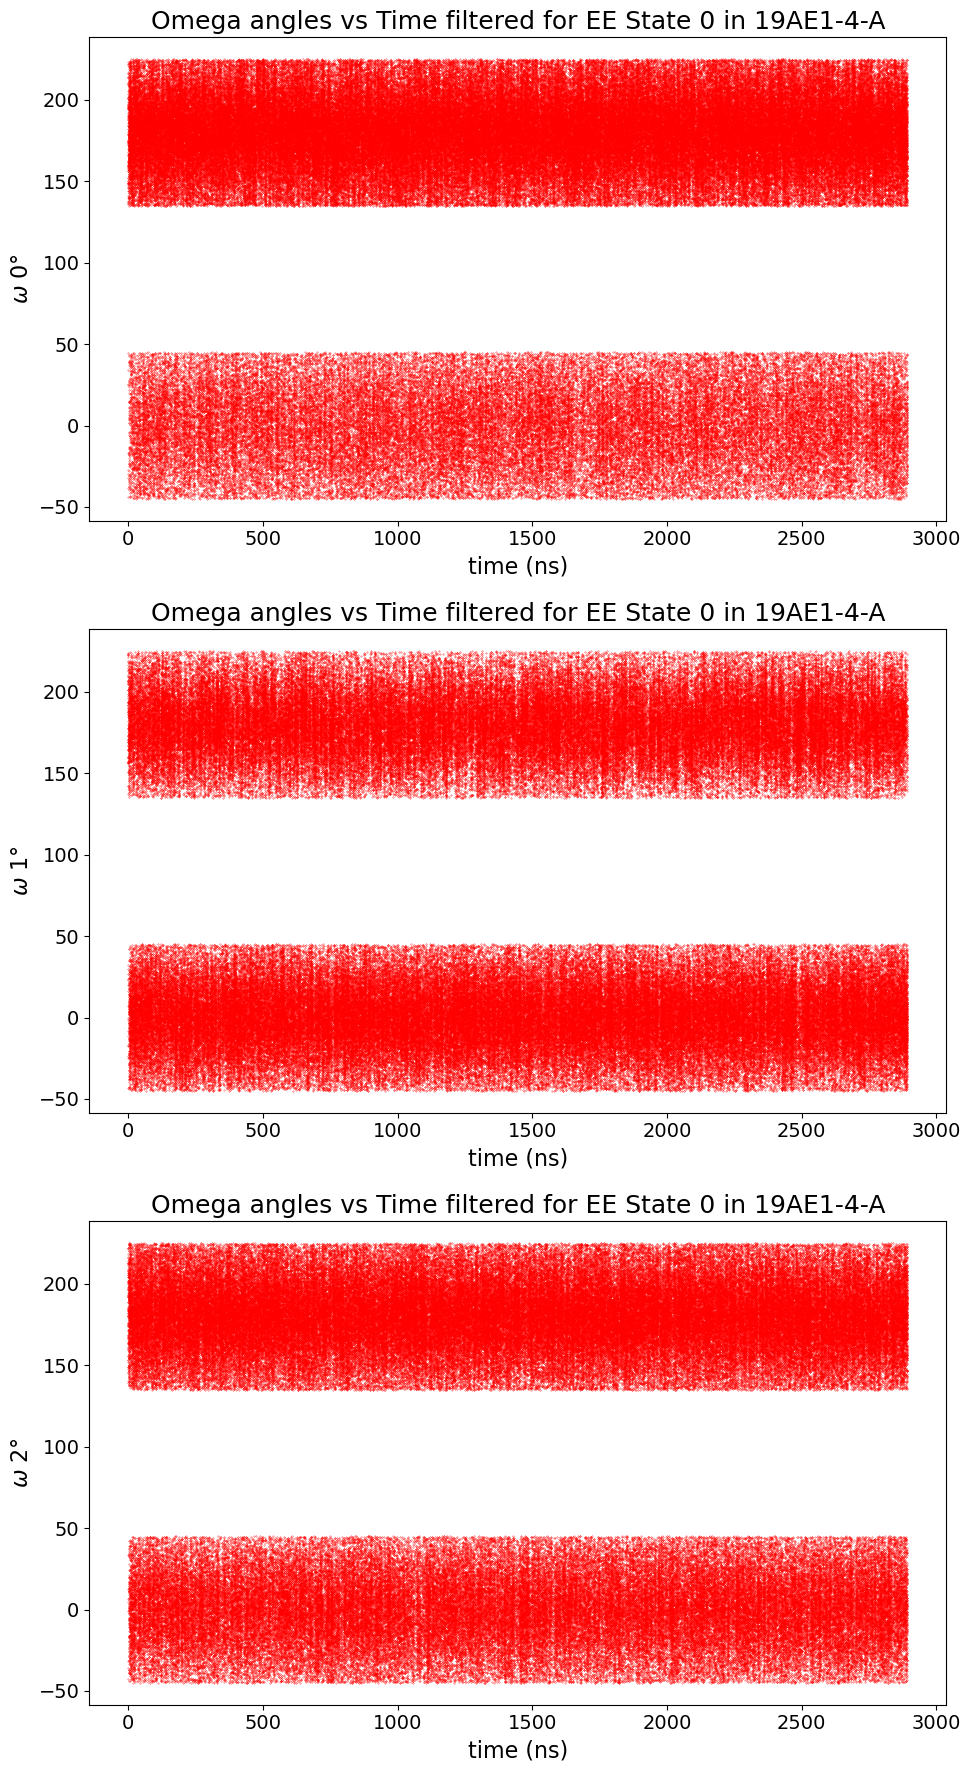

In [19]:
start = 0
nsnaps = filtered_omega.shape[0]
t = np.arange(start, nsnaps) * 0.01 # Time axis in ns
step = 1000
downsampled_omega = filtered_omega[start:nsnaps:step, :]  # Downsampled omega data

residues_to_plot = [0, 1, 2]
num_residues = len(residues_to_plot)

# Set default font sizes globally
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize=18)   # legend fontsize

plt.figure(figsize=(10, 18))
for panel, residue in enumerate(residues_to_plot, 1):
    plt.subplot(num_residues, 1, panel)
    plt.plot(t, filtered_omega[start:nsnaps, residue], '.', ms=0.5, color='red')
    plt.xlabel('time (ns)')
    plt.ylabel(f'$\\omega$ {residue}°')
    plt.title(f'Omega angles vs Time filtered for EE State 0 in 19AE1-4-A')

plt.tight_layout()

# Ensure the directory exists
#outfilename = f'omega_data/Omega_angles_vs_Time_EE_state0_filtered_in_19AE1-4-A.png'
plt.savefig(outfilename, transparent=True, dpi=600)
print(f"Saved at: {outfilename}")
#plt.show()

## Clustering

### Origin Omega

In [12]:
regularspace_estimator = RegularSpace(
    dmin=170,        # minimum distance between cluster centers, 180 degree
    max_centers=8,   # maximum number of cluster centers
    n_jobs=8,
)

In [13]:
# Fit the omegas data into model 
clustering = regularspace_estimator.fit(combined_omega).fetch_model()
assignments = clustering.transform(combined_omega)

print(clustering.cluster_centers)
print(f"Number of cluster centers: {len(clustering.cluster_centers)}")

[[170.27057   176.1753    178.87286  ]
 [ -9.480301  184.68762   165.62016  ]
 [-12.039162  -17.06366   165.34055  ]
 [201.19696   -26.022697  165.28728  ]
 [180.3377    179.9737      7.302765 ]
 [121.947266   11.078583  -21.288437 ]
 [-13.578018  183.20673   -12.849167 ]
 [-81.60111     3.1752396 -57.630257 ]]
Number of cluster centers: 8


/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/deeptime/clustering/_regspace.py:152: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn('Maximum number of cluster centers reached.'


In [14]:
## Assign each cluster center into cistrans 
cluster_center = clustering.cluster_centers
#print(cluster_center)

# Convert each value to "cis" or "trans"
cis_trans_labels = np.where(cluster_center < 90, "cis", "trans")

# Print results
for i, (center, labels) in enumerate(zip(cluster_center, cis_trans_labels)):
    print(f"Cluster {i}: {center} → {labels}")


Cluster 0: [170.27057 176.1753  178.87286] → ['trans' 'trans' 'trans']
Cluster 1: [ -9.480301 184.68762  165.62016 ] → ['cis' 'trans' 'trans']
Cluster 2: [-12.039162 -17.06366  165.34055 ] → ['cis' 'cis' 'trans']
Cluster 3: [201.19696  -26.022697 165.28728 ] → ['trans' 'cis' 'trans']
Cluster 4: [180.3377   179.9737     7.302765] → ['trans' 'trans' 'cis']
Cluster 5: [121.947266  11.078583 -21.288437] → ['trans' 'cis' 'cis']
Cluster 6: [-13.578018 183.20673  -12.849167] → ['cis' 'trans' 'cis']
Cluster 7: [-81.60111     3.1752396 -57.630257 ] → ['cis' 'cis' 'cis']


In [15]:
# count the number of each cluter 
counts = Counter(assignments)
#print(counts)

# Sort the counts 
sorted_counts = dict(sorted(counts.items()))
total_counts = sum(counts.values())
cluster = []

for label, frequency in sorted_counts.items():    
    precentage = (frequency / total_counts) * 100 
    cluster.append(precentage)
    print(f"Assignment {label}: {frequency}, {precentage:.4g}%")

outfile = 'clusters_probability.dat'
np.savetxt(outfile, cluster)

Assignment 0: 67727, 20.2%
Assignment 1: 26074, 7.777%
Assignment 2: 32028, 9.553%
Assignment 3: 77287, 23.05%
Assignment 4: 48846, 14.57%
Assignment 5: 52514, 15.66%
Assignment 6: 18531, 5.527%
Assignment 7: 12272, 3.66%


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_37347/1469998254.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


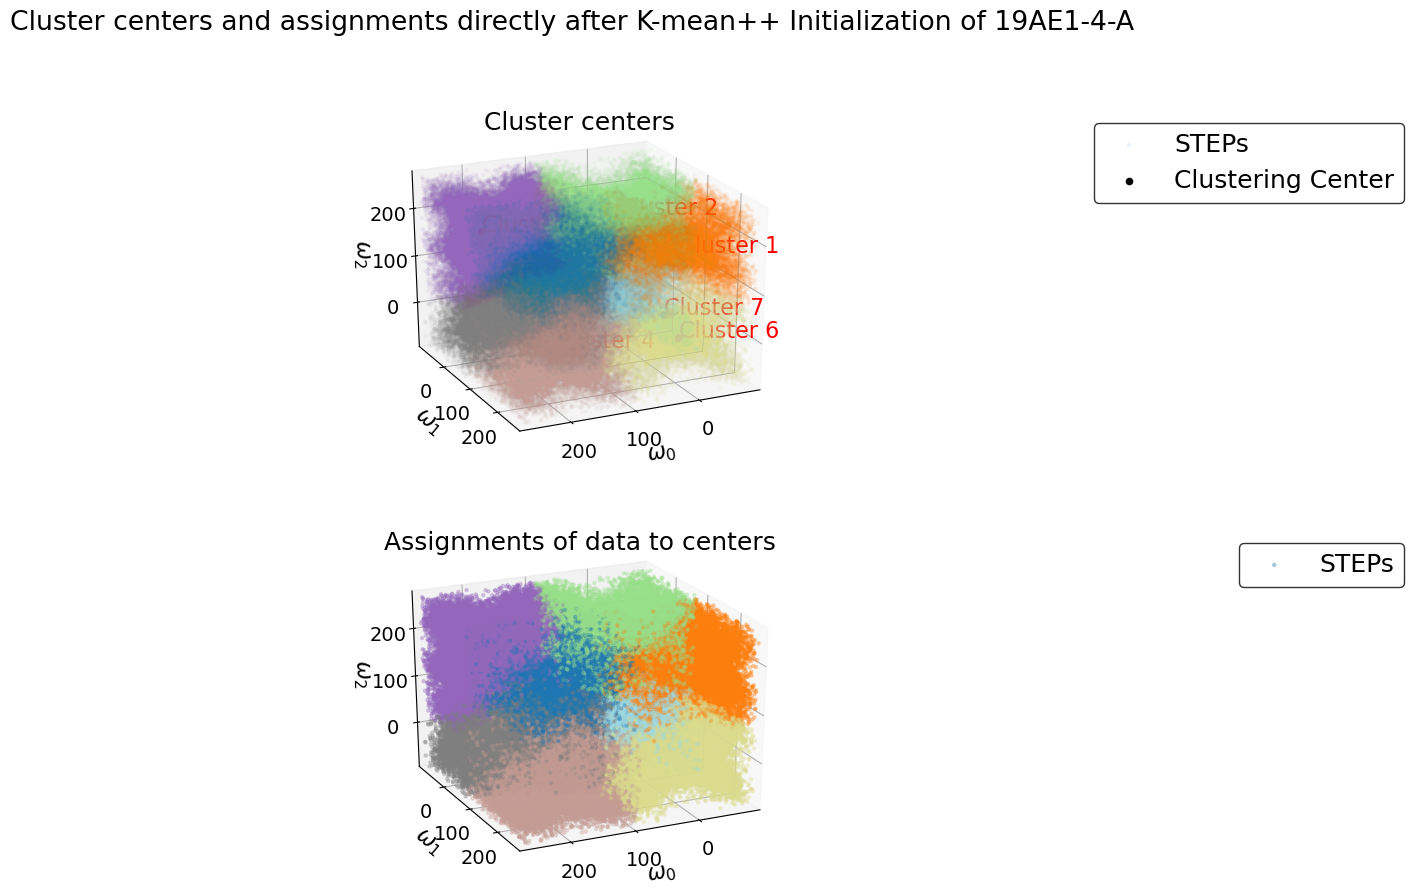

In [16]:
fig = plt.figure(figsize=(6, 10))

# Set the display range
x_min, x_max = -90, 270
y_min, y_max = -90, 270
z_min, z_max = -90, 270

# Viewing angles
elevation = 25  # Example elevation angle
azimuth = 65    # Example azimuthal angle

# Create a 3D subplot for cluster centers
ax1 = fig.add_subplot(211, projection='3d')
ax1.set_title('Cluster centers')
ax1.scatter(combined_omega[:, 0], combined_omega[:, 1], combined_omega[:, 2], c=assignments[:], marker='.', alpha=0.05,cmap='tab20',label='STEPs')
ax1.scatter(clustering.cluster_centers[:, 0], clustering.cluster_centers[:, 1], clustering.cluster_centers[:, 2], c='k', marker='o', alpha=1, label='Clustering Center')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_zlim(z_min, z_max)
ax1.view_init(elev=elevation, azim=azimuth)  # Set the viewing angle

# Label each cluster center
for i, (x, y, z) in enumerate(clustering.cluster_centers):
    ax1.text(x, y, z, f'Cluster {i}', color='red')

# Create a 3D subplot for assignments
ax2 = fig.add_subplot(212, projection='3d')
ax2.set_title('Assignments of data to centers')
ax2.scatter(combined_omega[:, 0], combined_omega[:, 1], combined_omega[:, 2], c=assignments[:], marker='.', alpha=0.3 , cmap='tab20', label='STEPs')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_zlim(z_min, z_max)
ax2.view_init(elev=elevation, azim=azimuth)  # Set the viewing angle

# Setting the legend
ax1.legend(loc='upper right', bbox_to_anchor=(2.3, 1.0), facecolor='white', edgecolor='k')
ax2.legend(loc='upper right', bbox_to_anchor=(2.3, 1.0), facecolor='white', edgecolor='k')

# Adding axis labels
ax1.set_xlabel(r'$\omega_0$')
ax1.set_ylabel(r'$\omega_1$')
ax1.set_zlabel(r'$\omega_2$')

ax2.set_xlabel(r'$\omega_0$')
ax2.set_ylabel(r'$\omega_1$')
ax2.set_zlabel(r'$\omega_2$')

# Adjust spacing between subplots
#plt.subplots_adjust(hspace=0.5)  # Increase the horizontal space between subplots

# Adjust layout
plt.tight_layout()

fig.suptitle('Cluster centers and assignments directly after K-mean++ Initialization of 19AE1-4-A')
fig.savefig('omega_data/cluster_centers_and_assignments.png',transparent=True, dpi=600, bbox_inches='tight')
plt.show()

In [23]:
# Step 1: Define fragment size and number of fragments
fragment_size = 500  # 5 ns
n_fragments = combined_omega.shape[0] // fragment_size

# Step 2: Slice data into fragments
fragments = np.array_split(combined_omega[:n_fragments * fragment_size], n_fragments)

# Step 3: Cluster assignments for the entire dataset
assignments = clustering.transform(combined_omega)

# Step 4: Initialize containers for <x> and <x^2>
cluster_sums = {cluster: 0 for cluster in range(8)} 
cluster_squares = {cluster: 0 for cluster in range(8)}
cluster_counts = {cluster: 0 for cluster in range(8)}

# Calculate statistics for each fragment
for fragment in fragments:
    fragment_assignments = assignments[:fragment_size]
    assignments = assignments[fragment_size:]  # Update remaining assignments

    # Count assignments in the fragment
    counts = Counter(fragment_assignments)
    for cluster in range(8):
        cluster_sums[cluster] += counts.get(cluster, 0) # 0 ensure that if the cluster is not present in the fragment, a default value of 0 is used
        cluster_squares[cluster] += counts.get(cluster, 0) ** 2
        cluster_counts[cluster] += fragment_size

# Step 5: Calculate error bars for each cluster
error_bars = {}
for cluster in range(8):
    N = n_fragments
    x_avg = cluster_sums[cluster] / cluster_counts[cluster]  # <x>
    x2_avg = cluster_squares[cluster] / cluster_counts[cluster]  # <x^2>
    error = 2 * np.sqrt(x2_avg - x_avg ** 2) / (N - 1)  # Formula
    error_bars[cluster] = error

# Step 6: Print error bars
for cluster, error in error_bars.items():
    #print(f"Cluster {cluster}: Error bar = {error:.6f} ")
    print(f"Cluster {cluster} error is: {error:.6f} ")

Cluster 0 error is: 0.014427 
Cluster 1 error is: 0.005826 
Cluster 2 error is: 0.006962 
Cluster 3 error is: 0.016157 
Cluster 4 error is: 0.010550 
Cluster 5 error is: 0.005222 
Cluster 6 error is: 0.010004 
Cluster 7 error is: 0.004387 


### filtered Omega

In [ ]:
regularspace_estimator = RegularSpace(
    dmin=170,        # minimum distance between cluster centers, 180 degree
    max_centers=8,   # maximum number of cluster centers
    n_jobs=8,
)

In [17]:
# Fit the omegas data into model 
clustering = regularspace_estimator.fit(filtered_omega).fetch_model()
assignments = clustering.transform(filtered_omega)

print(clustering.cluster_centers)
print(f"Number of cluster centers: {len(clustering.cluster_centers)}")

[[170.27057   176.1753    178.87286  ]
 [ -9.480301  184.68762   165.62016  ]
 [-12.039162  -17.06366   165.34055  ]
 [201.19696   -26.022697  165.28728  ]
 [180.3377    179.9737      7.302765 ]
 [ 20.695946   -6.1322784  -9.329025 ]
 [211.21933    -9.757912  -14.531319 ]
 [-13.578018  183.20673   -12.849167 ]]
Number of cluster centers: 8


In [18]:
## Assign each cluster center into cistrans 
cluster_center = clustering.cluster_centers
#print(cluster_center)

# Convert each value to "cis" or "trans"
cis_trans_labels = np.where(cluster_center < 90, "cis", "trans")

# Print results
for i, (center, labels) in enumerate(zip(cluster_center, cis_trans_labels)):
    print(f"Cluster {i}: {center} → {labels}")


Cluster 0: [170.27057 176.1753  178.87286] → ['trans' 'trans' 'trans']
Cluster 1: [ -9.480301 184.68762  165.62016 ] → ['cis' 'trans' 'trans']
Cluster 2: [-12.039162 -17.06366  165.34055 ] → ['cis' 'cis' 'trans']
Cluster 3: [201.19696  -26.022697 165.28728 ] → ['trans' 'cis' 'trans']
Cluster 4: [180.3377   179.9737     7.302765] → ['trans' 'trans' 'cis']
Cluster 5: [20.695946  -6.1322784 -9.329025 ] → ['cis' 'cis' 'cis']
Cluster 6: [211.21933   -9.757912 -14.531319] → ['trans' 'cis' 'cis']
Cluster 7: [-13.578018 183.20673  -12.849167] → ['cis' 'trans' 'cis']


In [19]:
# count the number of each cluter 
counts = Counter(assignments)
#print(counts)

# Sort the counts 
sorted_counts = dict(sorted(counts.items()))
total_counts = sum(counts.values())
cluster = []

for label, frequency in sorted_counts.items():    
    precentage = (frequency / total_counts) * 100 
    cluster.append(precentage)
    print(f"Assignment {label}: {frequency}, {precentage:.4g}%")

outfile = 'clusters_probability.dat'
np.savetxt(outfile, cluster)

Assignment 0: 37106, 19.9%
Assignment 1: 13128, 7.041%
Assignment 2: 15016, 8.054%
Assignment 3: 44676, 23.96%
Assignment 4: 27050, 14.51%
Assignment 5: 11365, 6.096%
Assignment 6: 28072, 15.06%
Assignment 7: 10030, 5.38%


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_37347/3777824034.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


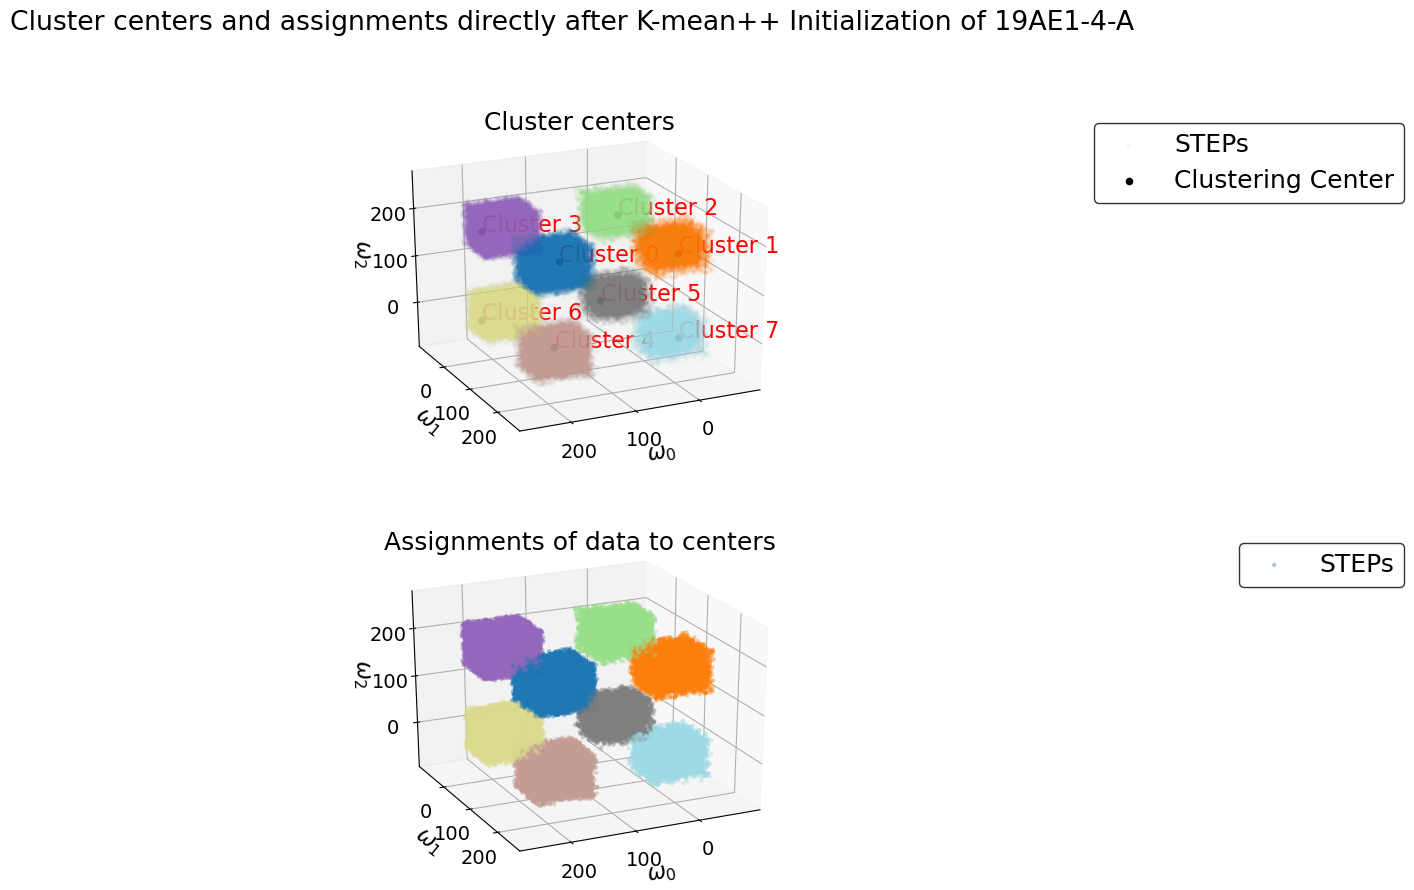

In [21]:
fig = plt.figure(figsize=(6, 10))

# Set the display range
x_min, x_max = -90, 270
y_min, y_max = -90, 270
z_min, z_max = -90, 270

# Viewing angles
elevation = 25  # Example elevation angle
azimuth = 65    # Example azimuthal angle

# Create a 3D subplot for cluster centers
ax1 = fig.add_subplot(211, projection='3d')
ax1.set_title('Cluster centers')
ax1.scatter(filtered_omega[:, 0], filtered_omega[:, 1], filtered_omega[:, 2], c=assignments[:], marker='.', alpha=0.05,cmap='tab20',label='STEPs')
ax1.scatter(clustering.cluster_centers[:, 0], clustering.cluster_centers[:, 1], clustering.cluster_centers[:, 2], c='k', marker='o', alpha=1, label='Clustering Center')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_zlim(z_min, z_max)
ax1.view_init(elev=elevation, azim=azimuth)  # Set the viewing angle

# Label each cluster center
for i, (x, y, z) in enumerate(clustering.cluster_centers):
    ax1.text(x, y, z, f'Cluster {i}', color='red')

# Create a 3D subplot for assignments
ax2 = fig.add_subplot(212, projection='3d')
ax2.set_title('Assignments of data to centers')
ax2.scatter(filtered_omega[:, 0], filtered_omega[:, 1], filtered_omega[:, 2], c=assignments[:], marker='.', alpha=0.3 , cmap='tab20', label='STEPs')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_zlim(z_min, z_max)
ax2.view_init(elev=elevation, azim=azimuth)  # Set the viewing angle

# Setting the legend
ax1.legend(loc='upper right', bbox_to_anchor=(2.3, 1.0), facecolor='white', edgecolor='k')
ax2.legend(loc='upper right', bbox_to_anchor=(2.3, 1.0), facecolor='white', edgecolor='k')

# Adding axis labels
ax1.set_xlabel(r'$\omega_0$')
ax1.set_ylabel(r'$\omega_1$')
ax1.set_zlabel(r'$\omega_2$')

ax2.set_xlabel(r'$\omega_0$')
ax2.set_ylabel(r'$\omega_1$')
ax2.set_zlabel(r'$\omega_2$')

# Adjust spacing between subplots
#plt.subplots_adjust(hspace=0.5)  # Increase the horizontal space between subplots

# Adjust layout
plt.tight_layout()

fig.suptitle('Cluster centers and assignments directly after K-mean++ Initialization of 19AE1-4-A')
fig.savefig('omega_data/cluster_centers_and_assignments_filtered_omega.png',transparent=True, dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# Step 1: Define fragment size and number of fragments
fragment_size = 500  # 5 ns
n_fragments = filtered_omega.shape[0] // fragment_size

# Step 2: Slice data into fragments
fragments = np.array_split(filtered_omega[:n_fragments * fragment_size], n_fragments)

# Step 3: Cluster assignments for the entire dataset
assignments = clustering.transform(filtered_omega)

# Step 4: Initialize containers for <x> and <x^2>
cluster_sums = {cluster: 0 for cluster in range(8)} 
cluster_squares = {cluster: 0 for cluster in range(8)}
cluster_counts = {cluster: 0 for cluster in range(8)}
 
# Calculate statistics for each fragment
for fragment in fragments:
    fragment_assignments = assignments[:fragment_size]
    assignments = assignments[fragment_size:]  # Update remaining assignments

    # Count assignments in the fragment
    counts = Counter(fragment_assignments)
    for cluster in range(8):
        cluster_sums[cluster] += counts.get(cluster, 0) # 0 ensure that if the cluster is not present in the fragment, a default value of 0 is used
        cluster_squares[cluster] += counts.get(cluster, 0) ** 2
        cluster_counts[cluster] += fragment_size

# Step 5: Calculate error bars for each cluster
error_bars = {}
for cluster in range(8):
    N = n_fragments
    x_avg = cluster_sums[cluster] / cluster_counts[cluster]  # <x>
    x2_avg = cluster_squares[cluster] / cluster_counts[cluster]  # <x^2>
    error = 2 * np.sqrt(x2_avg - x_avg ** 2) / (N - 1)  # Formula
    error_bars[cluster] = error

# Step 6: Print error bars
for cluster, error in error_bars.items():
    #print(f"Cluster {cluster}: Error bar = {error:.6f} ")
    print(f"Cluster {cluster} error is: {error:.6f} ")

Cluster 0 error is: 0.025763 
Cluster 1 error is: 0.009724 
Cluster 2 error is: 0.010957 
Cluster 3 error is: 0.030741 
Cluster 4 error is: 0.019248 
Cluster 5 error is: 0.008628 
Cluster 6 error is: 0.019869 
Cluster 7 error is: 0.007677 
